# Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [4]:
df.info()        # Checks data types & missing values
df.describe()    # Statistical summary
df['Attrition'].value_counts()  # Class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

# Data Cleaning

In [9]:
print(df.isnull().sum()) #Check for missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# Dropping unnecessary columns as they don't add much value for the analysis
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [13]:
df.to_csv('WA_Fn-UseC_-HR-Employee-Attrition_cleaned.csv', index=False)

In [15]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,4,Female,...,3,2,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,4,Male,...,3,2,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,2,Female,...,3,1,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,2,Male,...,3,2,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,4,Female,...,3,4,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,...,3,1,0,6,3,4,4,3,1,2


# Univariate Analysis

Key Goals To identify :
- Identify patterns in who is leaving — by age, department, salary, etc.
- Understand imbalance (usually more "No" than "Yes" in attrition).

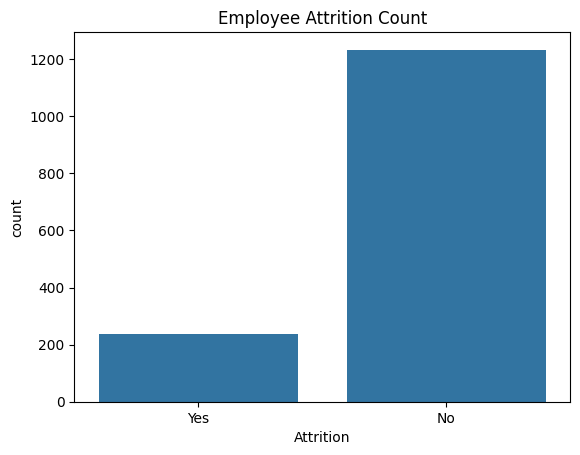

In [19]:
#Attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')
plt.show()

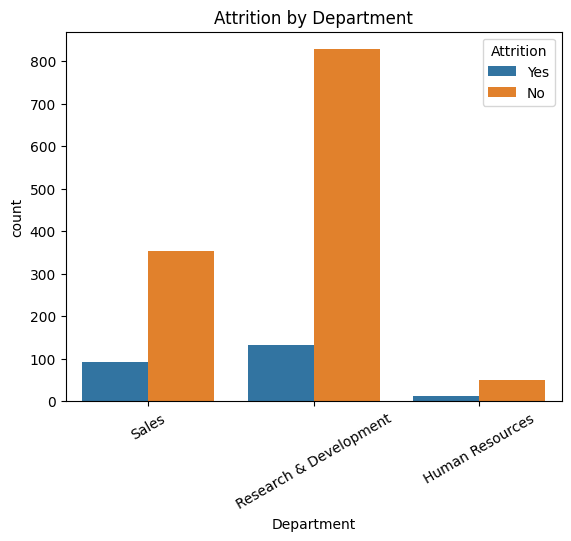

In [21]:
#attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=30)
plt.show()

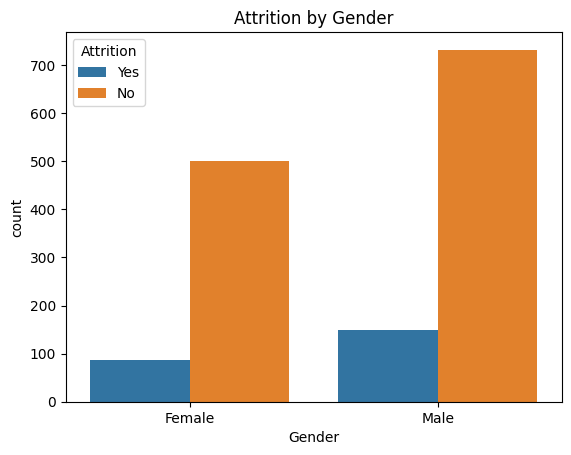

In [23]:
#Attrition By Gender
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.show()

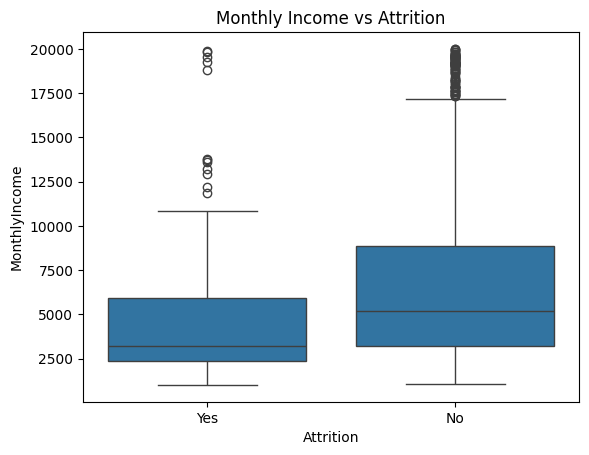

In [25]:
# MothlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()


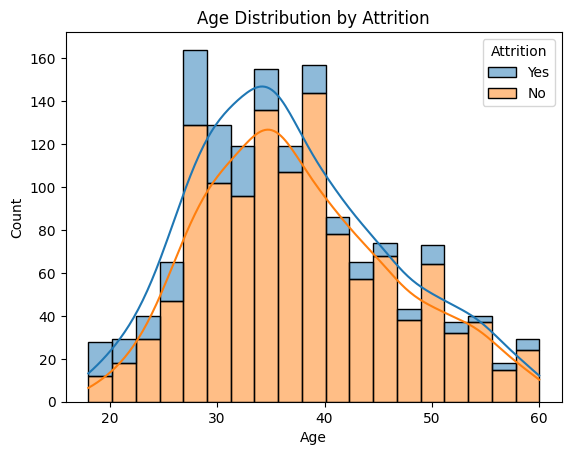

In [27]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack')
plt.title('Age Distribution by Attrition')
plt.show()

# ML Model

In [30]:
# converting string based coloumns to numeric based
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [32]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [34]:
from sklearn.model_selection import train_test_split # Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Logistic Regression Model
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


[[254   1]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [48]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[226  29]
 [ 30   9]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



In [54]:
# Logistic Regression predictions
log_preds = log_model.predict(X_test)

# Decision Tree predictions
tree_preds = tree_model.predict(X_test)


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize comparison structure
model_results = {
    "Model": [],
    "Accuracy": [],
    "Precision (Yes)": [],
    "Recall (Yes)": [],
    "F1 Score (Yes)": []
}

# Function to store metrics
def evaluate_model(name, y_true, y_pred):
    model_results["Model"].append(name)
    model_results["Accuracy"].append(round(accuracy_score(y_true, y_pred), 2))
    model_results["Precision (Yes)"].append(round(precision_score(y_true, y_pred), 2))
    model_results["Recall (Yes)"].append(round(recall_score(y_true, y_pred), 2))
    model_results["F1 Score (Yes)"].append(round(f1_score(y_true, y_pred), 2))

# Add your existing predictions
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_results)
print(comparison_df)


                 Model  Accuracy  Precision (Yes)  Recall (Yes)  \
0  Logistic Regression      0.88             0.80          0.10   
1        Decision Tree      0.80             0.24          0.23   

   F1 Score (Yes)  
0            0.18  
1            0.23  


 Result Conclusion :

According to the goal of this project — predicting employee attrition — the Decision Tree model performs better than Logistic Regression

While Logistic Regression has a higher overall accuracy, it fails to identify most employees who actually left the company (recall = 10%).
This makes it less reliable for proactive HR decision-making.

In contrast, the Decision Tree model successfully identifies more actual attrition cases (recall = 23%), even if it introduces more false positives.
This trade-off is acceptable in HR scenarios, where catching potential leavers early is more important than a few incorrect alerts.

Therefore, the Decision Tree model is preferred for this use case.

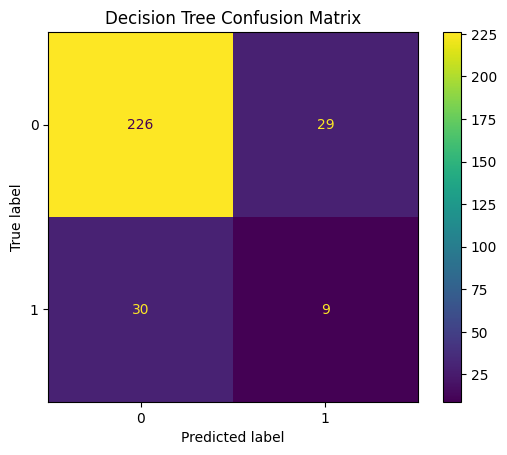

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# SHAP (SHapley Additive Explanations) 

To make the model more explainable, to analyze how each feature contributes to the attrition predictions made by Decision Tree model.

In [65]:
import shap

In [67]:
# Only needed once
shap.initjs()

# Create TreeExplainer for the Decision Tree model
explainer = shap.TreeExplainer(tree_model)

# Select a sample of test data
X_sample = X_test.sample(100, random_state=42)

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)


In [73]:
# Summary plot to see top contributing features
type(shap_values)

numpy.ndarray

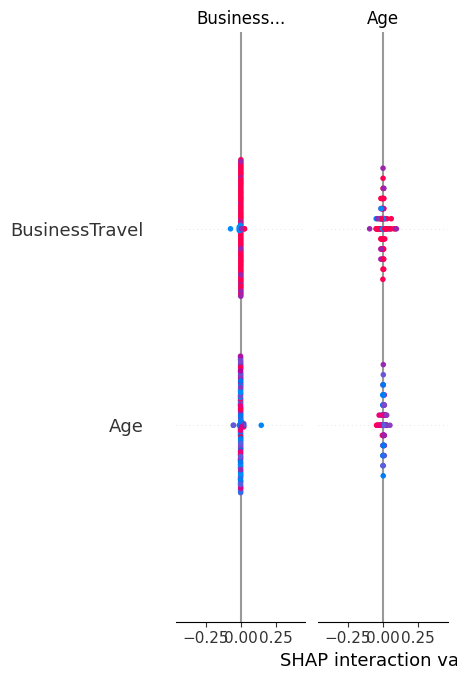

<Figure size 640x480 with 0 Axes>

In [109]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")
plt.savefig("shap_summary.png", bbox_inches='tight', dpi=300)